<a href="https://colab.research.google.com/github/candrajulius/Pengembangan_Machine_Learning/blob/final_submission_ml/Submission_Akhir_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama     : Candra Julius Sinaga**
# **EXP      : 12.737**
# **Lokasi   : Sumatera Utara**
# **Bergabung: Sejak 03 Januari 2020**



# **Submission Machine Learning**

## **Install Data From Kaggle**


In [1]:
!pip install -q kaggle

## **Upload Kaggle JSON**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"candrajuliussinaga","key":"f1b5e10673fde9255b882ba2af119a93"}'}

## **Make directory & Change Permission Kaggle**


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


## **Download Dataset from kaggle**

In [4]:
!kaggle datasets download -d nurnob101/rice-disease

100% 3.98G/3.99G [00:48<00:00, 86.2MB/s]
100% 3.99G/3.99G [00:48<00:00, 87.7MB/s]


## **Extract Zip File**

In [5]:
from zipfile import ZipFile
file_name = "/content/rice-disease.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Selesai")

Selesai


## **Import Library for Your Need**

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
import matplotlib.pyplot as plt

## **Make Train and Validation dir**

In [7]:
base_dir = '/content/Data-image'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

Gudi_dir = os.path.join('/content/Data-image/Gudi_rotten')
apex_dir = os.path.join('/content/Data-image/apex_blast')
blast_dir = os.path.join('/content/Data-image/leaf_blast')
burn_dir = os.path.join('/content/Data-image/leaf_burn')
paddy_dir = os.path.join('/content/Data-image/neck_blast_paddy')

## **Sum files**

In [8]:
print('total training gudi images ',len(os.listdir(Gudi_dir)))

print('total training apex images ',len(os.listdir(apex_dir)))

print('total training leaf Blast images ',len(os.listdir(blast_dir)))

print('total training leaf Burn images ',len(os.listdir(burn_dir)))

print('total training nect Blast Paddy images ',len(os.listdir(paddy_dir)))

total training gudi images  500
total training apex images  500
total training leaf Blast images  500
total training leaf Burn images  500
total training nect Blast Paddy images  500


## **Sum Max Image From Dataset**

In [9]:
lable_data = {}
files_total = 0
for i in os.listdir(base_dir):
  counting = len(os.listdir(os.path.join(base_dir,i)))
  lable_data[i] = counting
  files_total += counting
  print("Total Files : " + str(files_total))

Total Files : 500
Total Files : 1000
Total Files : 1500
Total Files : 2000
Total Files : 2500


## **Make a new directory Train and Val**

In [10]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [11]:
train_gudi = os.path.join(train_dir, 'gudi')
train_apex = os.path.join(train_dir, 'apex')
train_blast = os.path.join(train_dir, 'blast')
train_burn = os.path.join(train_dir, 'burn')
train_paddy = os.path.join(train_dir, 'paddy')

val_gudi = os.path.join(validation_dir, 'gudi')
val_apex = os.path.join(validation_dir, 'apex')
val_blast = os.path.join(validation_dir, 'blast')
val_burn = os.path.join(validation_dir, 'burn')
val_paddy = os.path.join(validation_dir, 'paddy')

In [12]:
os.mkdir(train_gudi)
os.mkdir(train_apex)
os.mkdir(train_blast)
os.mkdir(train_burn)
os.mkdir(train_paddy)

os.mkdir(val_gudi)
os.mkdir(val_apex)
os.mkdir(val_blast)
os.mkdir(val_burn)
os.mkdir(val_paddy)

## **split each directory into train data and validation data**

In [13]:
train_gudi_dir, val_gudi_dir = train_test_split(os.listdir(Gudi_dir), test_size = 0.2)
train_apex_dir, val_apex_dir = train_test_split(os.listdir(apex_dir), test_size = 0.2)
train_blast_dir, val_blast_dir = train_test_split(os.listdir(blast_dir), test_size = 0.2)
train_burn_dir, val_burn_dir = train_test_split(os.listdir(burn_dir), test_size = 0.2)
train_paddy_dir, val_paddy_dir = train_test_split(os.listdir(paddy_dir), test_size = 0.2)

In [14]:
for file in train_gudi_dir:
  shutil.copy(os.path.join(Gudi_dir, file), os.path.join(train_gudi, file))
for file in train_apex_dir:
  shutil.copy(os.path.join(apex_dir,file), os.path.join(train_apex,file))
for file in train_blast_dir:
  shutil.copy(os.path.join(blast_dir,file), os.path.join(train_blast,file))
for file in train_burn_dir:
  shutil.copy(os.path.join(burn_dir,file), os.path.join(train_burn,file))
for file in train_paddy_dir:
  shutil.copy(os.path.join(paddy_dir,file), os.path.join(train_paddy,file))


for file in val_gudi_dir:
  shutil.copy(os.path.join(Gudi_dir, file), os.path.join(val_gudi,file))
for file in val_apex_dir:
  shutil.copy(os.path.join(apex_dir,file), os.path.join(val_apex,file))
for file in val_blast_dir:
  shutil.copy(os.path.join(blast_dir,file), os.path.join(val_blast,file))
for file in val_burn_dir:
  shutil.copy(os.path.join(burn_dir,file), os.path.join(val_burn,file))
for file in val_paddy_dir:
  shutil.copy(os.path.join(paddy_dir,file), os.path.join(val_paddy,file))

## **Make for ImageDataGenerator()**

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validasi_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## **Arsitektur Conv2D Layers**

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

## **See Model Summary CNN**

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 128)       0

In [19]:
from PIL import Image
for image_address in os.listdir(Gudi_dir):
  try:
    Image.open(os.path.join(Gudi_dir,image_address))
  except:
    print("Terjadi kesalahan pada system: " + image_address)  

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("Akurasi telah mencapai diatas 92%, Sudah selesai")
      self.model.stop_training = True

callbacks = myCallback()


## **Compile Model**

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## **Melatih Model**

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validasi_generator,
    validation_steps = 5,
    verbose = 1,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 [==============================] - 151s 6s/step - loss: 1.5570 - accuracy: 0.3175 - val_loss: 1.3124 - val_accuracy: 0.4187
Epoch 2/20
25/25 [==============================] - 137s 6s/step - loss: 1.1202 - accuracy: 0.4796 - val_loss: 0.7143 - val_accuracy: 0.7188
Epoch 3/20
25/25 [==============================] - 138s 6s/step - loss: 0.9034 - accuracy: 0.5788 - val_loss: 0.9419 - val_accuracy: 0.6125
Epoch 4/20
25/25 [==============================] - 133s 5s/step - loss: 0.8019 - accuracy: 0.6413 - val_loss: 0.6524 - val_accuracy: 0.7063
Epoch 5/20
25/25 [==============================] - 131s 5s/step - loss: 0.7034 - accuracy: 0.6862 - val_loss: 0.8683 - val_accuracy: 0.6562
Epoch 6/20
25/25 [==============================] - 129s 5s/step - loss: 0.5534 - accuracy: 0.7755 - val_loss: 0.5376 - val_accuracy: 0.8125
Epoch 7/20
25/25 [==============================] - 129s 5s/step - loss: 0.4227 - accuracy: 0.8418 - val_loss: 0.3184 - val_accuracy: 0.8875
Epoch 8/20
25

## **Plot Akurasi And Loss Model**

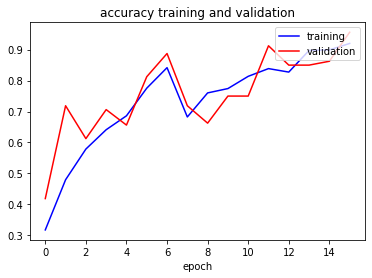

In [23]:
plt.plot(history.history['accuracy'], label='training', color='blue')
plt.plot(history.history['val_accuracy'],label='validation',color='red')
plt.title('accuracy training and validation')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

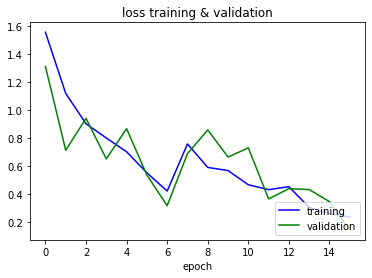

In [24]:
plt.plot(history.history['loss'],label='training',color='blue')
plt.plot(history.history['val_loss'],label='validation',color='green')
plt.title('loss training & validation')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

## **Convert Model To Model TFLite**

In [25]:
import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model,export_dir)

In [26]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('Nasi_Dessess.tflite')
tflite_model_file.write_bytes(tflite_model)

1454008